# THE ANDROID APP MARKET ON GOOGLE PLAY


# 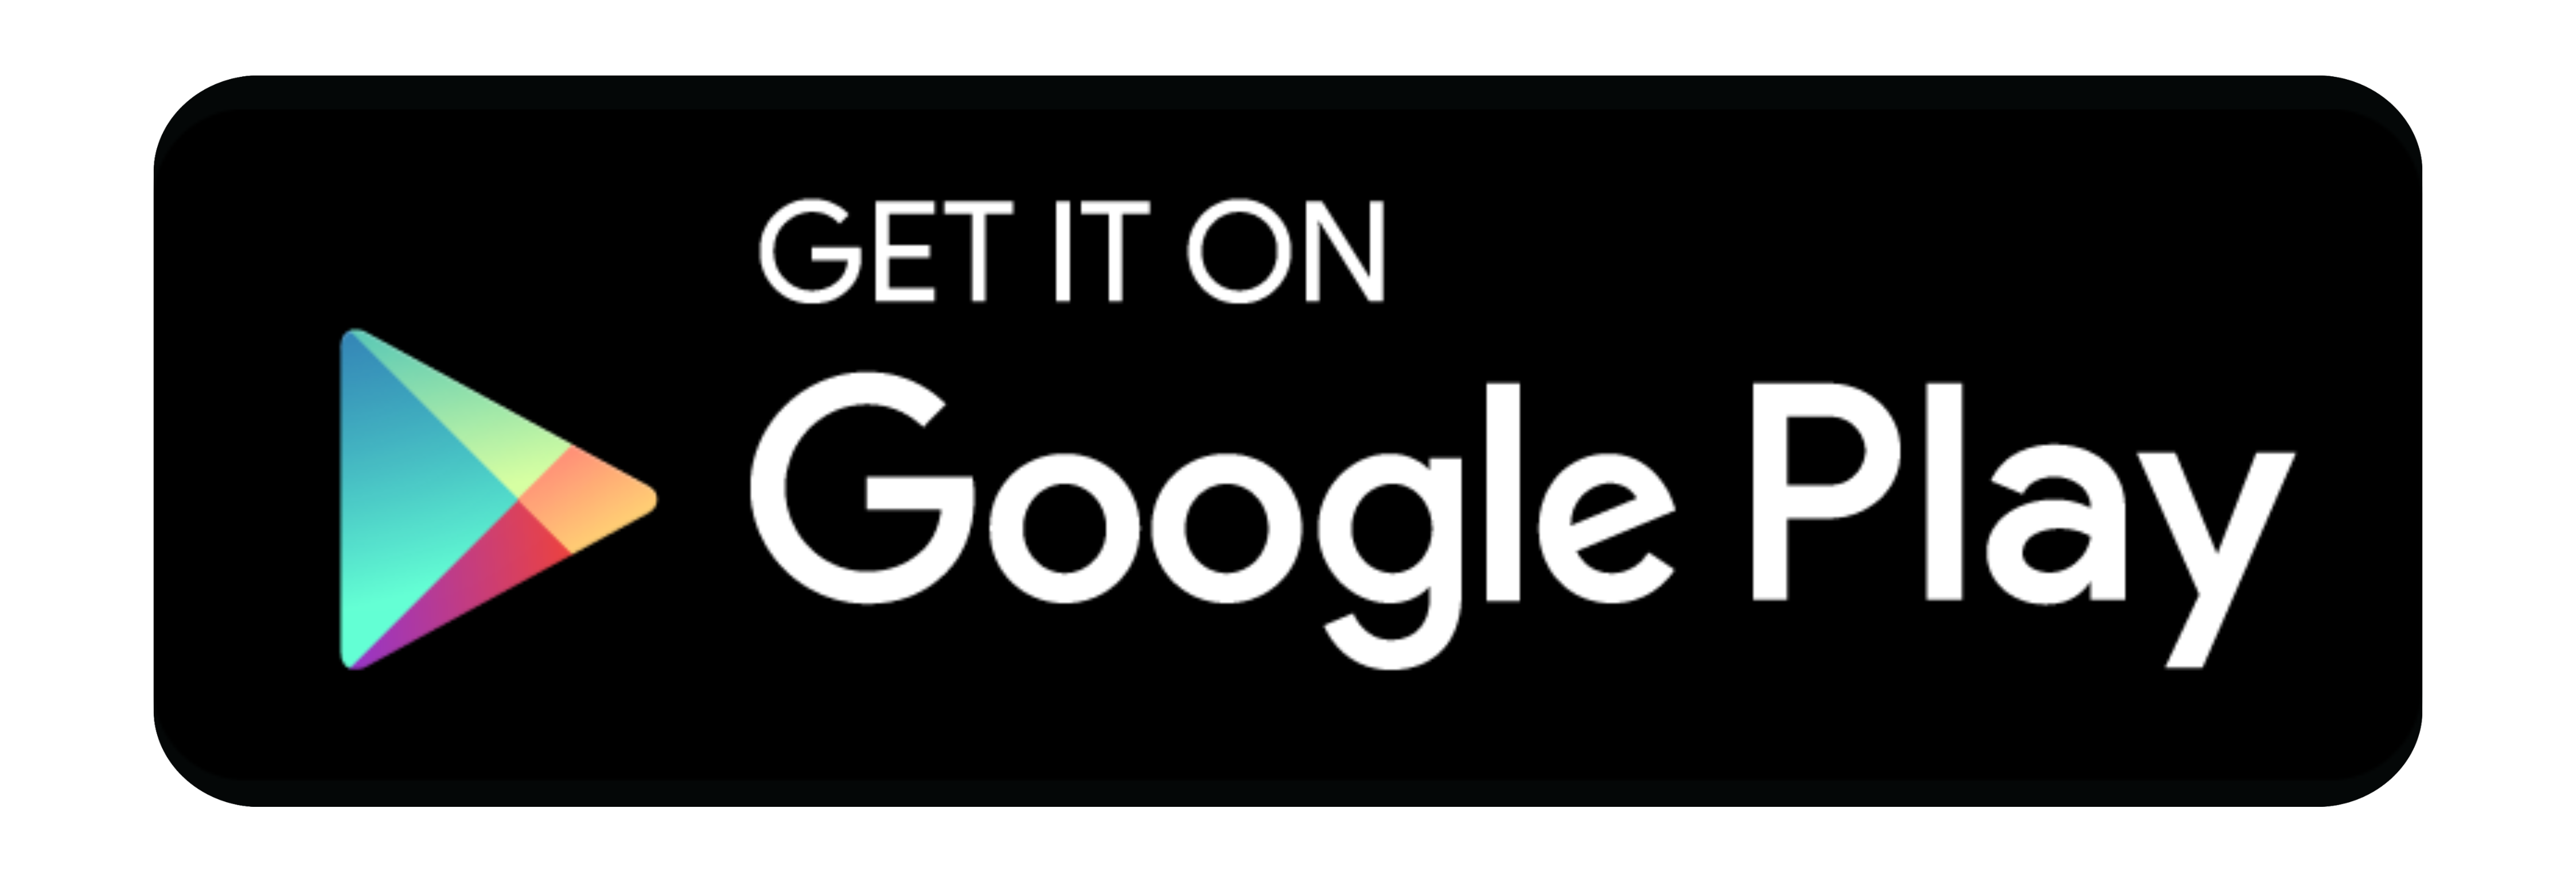

   Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market.

   The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps. The dataset you will use here was scraped from Google Play Store in September 2018 and was published on Kaggle (https://www.kaggle.com/datasets/lava18/google-play-store-apps).   

### datasets/googleplaystore.csv
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app:
1. App: Name of the app
2. Category: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
3. Rating: The current average rating (out of 5) of the app on Google Play
4. Reviews: Number of user reviews given on the app
5. Size: Size of the app in MB (megabytes)
6. Installs: Number of times the app was downloaded from Google Play
7. Type: Whether the app is paid or free
8. Price: Price of the app in USD
9. Last Updated: Date on which the app was last updated on Google Play

### datasets/user_reviews.csv
This file contains all the a random sample of 100 user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
1. App: Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file
2. Review: The pre-processed user review text
3. Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral
4. Sentiment Score: Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.

In [42]:
# Read in dataset
import pandas as pd
gps = pd.read_csv("C:/Users/HP Laptop/Documents/Programming Stuff/Datasets/googleplaystore.csv")

# Drop duplicates from apps_with_duplicates
apps = gps.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps)

# Have a look at a random sample of 5 rows
print(apps.sample(n=5))

Total number of apps in the dataset =                                                       App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LI

### *DATA CLEANING*

One of the most important subtasks in every data science project is data cleaning. Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. Although it can be a time-consuming process, its important because it improves the quality and reliability of your data and helps you avoid errors or biases in your analyses. Therefore should never be underestimated.

We can see that some entries in the columns like `Installs` and `Price` include a few unusual characters (`+` `,` `$`) due to the way the numbers have been represented by looking at a random sample of the dataset rows (from the preceding task). This prevents the columns from being solely numeric, making future mathematical calculations more difficult. As their titles suggest, we would prefer that these columns exclusively include digits from [0-9].

As a result, we will immediately start to clean our data. The special characters `,` and `+` in the Installs column, as well as `$` in the Price column, must be eliminated.

It's also a good idea to print a summary of your data frame when you've finished cleaning it up. To accomplish this, we will use the `info()` method.




In [43]:
# List of characters to remove
chars_to_remove = ['+',',','$']
# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].str.replace(char, '', regex=False)
        
# Print a summary of the apps dataframe
print(apps.info())

apps.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### *Fixing Data Type Issues*
We noted that `Installs` and `Price` were classified as `object` data types (rather than `int` or `float`) in the previous task. This is because the original input types for these two columns were digits and special characters. 

`Installs`, `Size`, `Rating`, and `Price` are the four features we will be working with the most in the future. While `Size` and `Rating` are both `floats` (pure numerical data types), we still need to work on making `Installs` and `Price` numeric.


In [44]:
import numpy as np

# Convert Installs and Price to float data type
apps = apps.apply(pd.to_numeric, errors='ignore')

# Checking dtypes of the apps dataframe
print(apps.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### *Exploring App Categories*
Google Play, with over 1 billion active users in 190 countries worldwide, is a key distribution tool for building a global audience. Businesses must make their apps more rapidly and easily discoverable on Google Play in order to get them in front of users. Google has introduced the concept of categorizing apps to better the overall search experience. 

This brings us to the following questions:
1. Which category has the highest share of (active) apps in the market?
2. Is any specific category dominating the market?
3. Which categories have the fewest number of apps?

We will find that our dataset has `34` distinct app categories. The most popular apps on the market are those for **families** and **games**. Suprisingly, *business, medicine, and tools* apps also rank high.

In [45]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  34


### *Distribution of App Ratings*

After seeing the market share for each app category, let's examine how all of these apps perform on average. App ratings (on a scale of 1 to 5) determine app discoverability, conversion, and the company's overall brand image. Ratings are an important performance measure for an app.

According to our analysis, the average number of ratings across all app categories is `4.17`. The histogram figure is tilted to the right, showing that the vast majority of the apps are highly rated, with only a few low-ranked exceptions.


In [46]:
# Average rating of apps
avg_app_rating =  apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.189542336669298


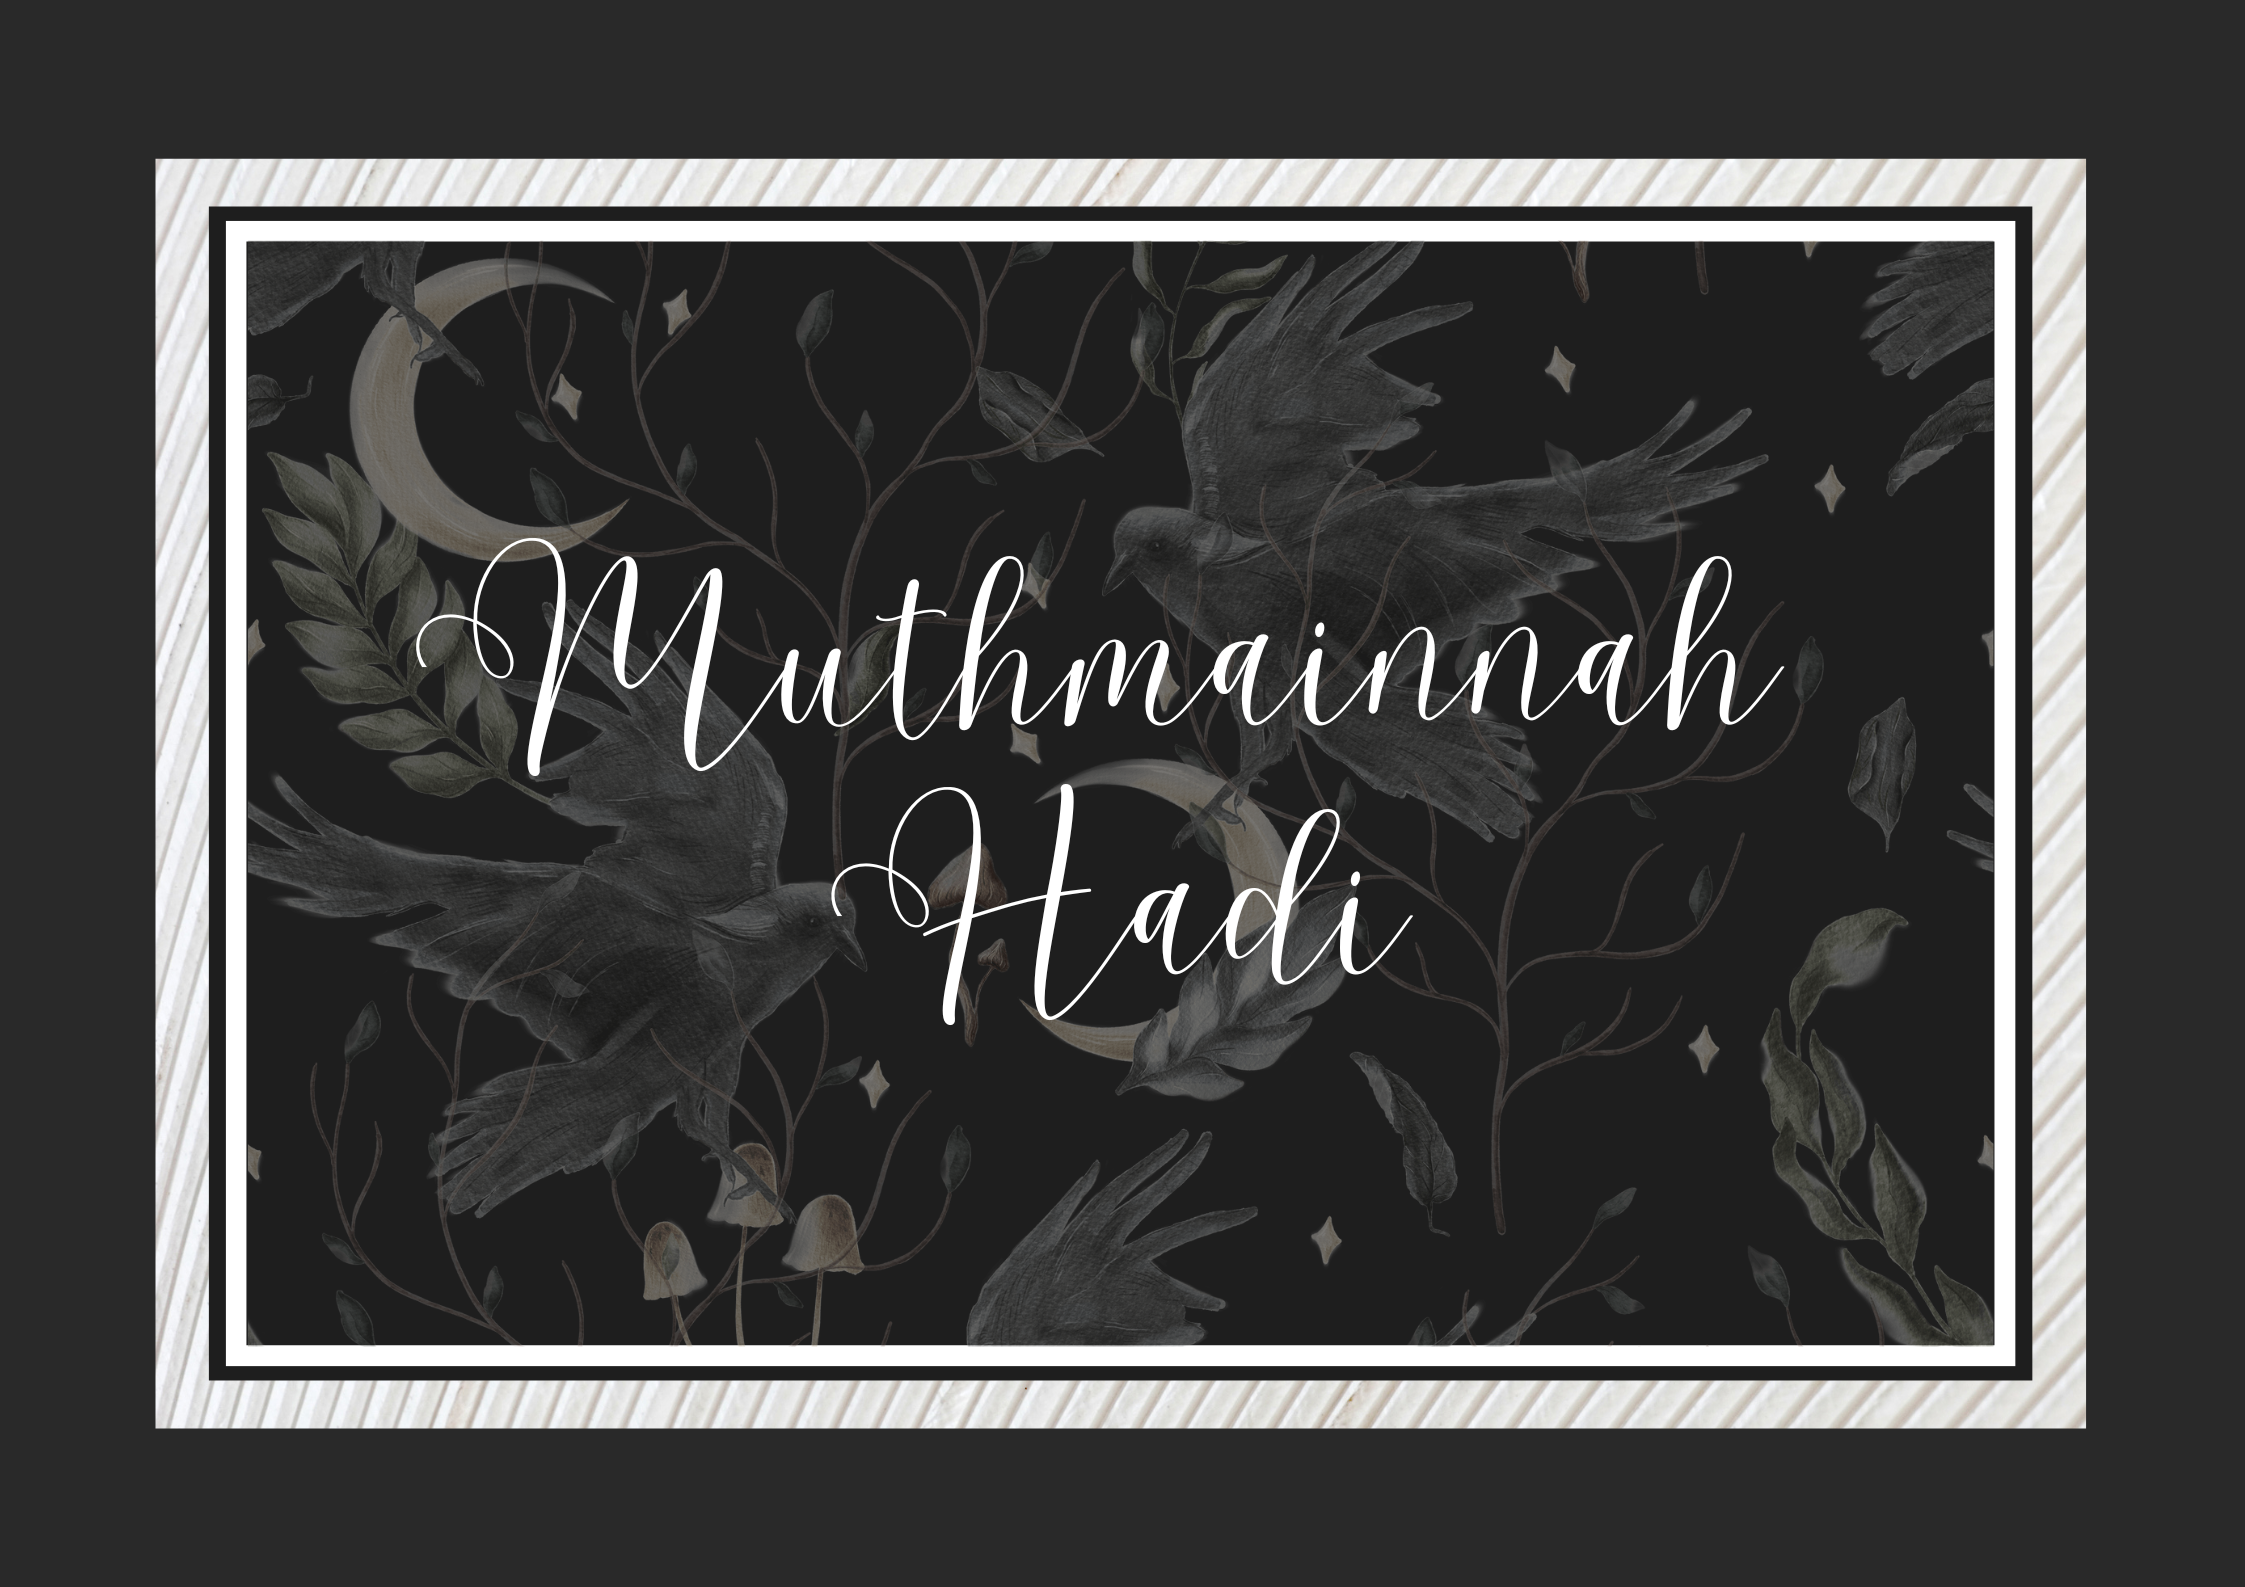